In [ ]:
# preliminary-analysis-2024-comb-building.ipynb
#
# Bryan Daniels
# 2024/3/29
#
# Continuing analysis started in 2021, looking for predictors of comb-building
# and thinking about ways the dynamics of the total amount of comb-building 
# could be modeled
#

In [1]:
import pandas as pd
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt
%matplotlib inline
from toolbox import defaultFigure
defaultFigure.setDefaultParams()

In [2]:
# import stuff from jacob davidson's github repository: https://github.com/jacobdavidson/bees_drones_2019data
from bees_drones_2019data import displayfunctions as bp  # 'bee plots'
from bees_drones_2019data import datafunctions as dfunc
from bees_drones_2019data import definitions_2019 as bd
dfunc.init(bd) 
bp.init(bd)
bd.year

2019

# Load data

The days with festoons are roughly (1) between day 4 and 20 and (2) between day 46 and 65

In [3]:
days_to_load = np.arange(4,6)

## Load 5-minute behavioral data

(Note that these data are in a different format than what was loaded in `preliminary-analysis-2021-comb-building.ipynb`)

In [4]:
# data from 2019: https://zenodo.org/records/7298798
behavioral_data_dir = '../Data/240329/df_day5min/'

In [5]:
dfList = [ pd.read_hdf('{}df_day5min_{:03d}.hdf'.format(behavioral_data_dir,daynum)) for daynum in days_to_load ]
dfFiveMinute = pd.concat(dfList)

In [6]:
# time conversion
minutes_per_division = 5
divisions_per_day = 24*60/minutes_per_division
dfFiveMinute['Time (days)'] = dfFiveMinute['Day number'] + dfFiveMinute['timedivision']/divisions_per_day

## Load trajectory data

In [7]:
# data from 2019: https://zenodo.org/records/7298798
trajectory_data_dir = '../Data/231018/trajectories_000-019/'

In [8]:
#dfTrajList = [ pd.read_hdf('{}beetrajectories_{:03d}.hdf'.format(trajectory_data_dir,daynum)) for daynum in days_to_load ]
#dfTraj = pd.concat(dfTrajList) # avoid explicitly creating list to save memory
filenames = [ '{}beetrajectories_{:03d}.hdf'.format(trajectory_data_dir,daynum) for daynum in days_to_load ]
dfTraj = pd.concat(map(pd.read_hdf,filenames))

In [18]:
# time conversion
frames_per_second = 3
frames_per_day = 24*60*60*frames_per_second
dfTraj['Time (days)'] = dfTraj['daynum'] + dfTraj['framenum']/frames_per_day

In [19]:
dfTraj.head()

,daynum,framenum,uid,x,y,camera,theta,Time (days)
0,4,0,4,576,4770,0,2.84584,4.000000
1,4,6,4,563,4762,0,-3.06435,4.000023
2,4,7,4,563,4762,0,-3.11650,4.000027
3,4,8,4,557,4762,0,-2.96840,4.000031
4,4,9,4,557,4757,0,-2.99306,4.000035


In [20]:
print("Trajectories use {:.1f} GB of memory.".format(dfTraj.memory_usage().sum()/1e9))

Trajectories use 17.6 GB of memory.


## Load comb contents data

In [13]:
# data from 2019: https://zenodo.org/records/7298798
comb_contents_dir = '../Data/240329/comb-contents-images2019/'

In [14]:
# load the comb structure
combDict = dict([ (daynum, pickle.load(gzip.open(comb_contents_dir+'comb_{:03d}.pklz'.format(daynum),'rb'))) for daynum in days_to_load ])

In [15]:
combDict[4]

# Find bees that are festooning a lot or a little, and compare their trajectories

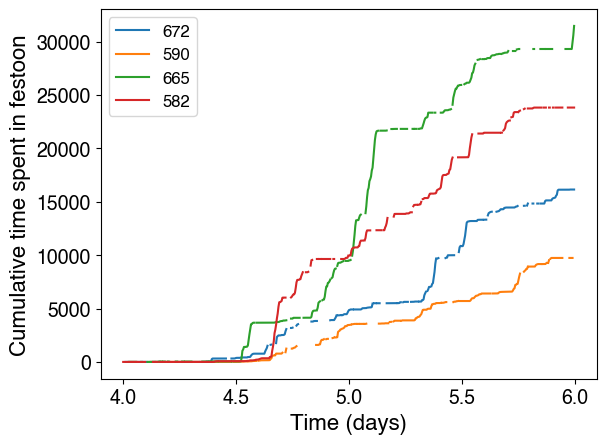

In [16]:
# sanity check: recreating a plot from preliminary-analysis-2021-comb-building.ipynb
# (largest festooners)
for beeID in [672,590,665,582]:
    dfFiveMinuteBee = dfFiveMinute[dfFiveMinute['Bee unique ID']==beeID]
    times = dfFiveMinuteBee['Time (days)']
    cumulativeFestoon = np.cumsum(dfFiveMinuteBee['Festoon'])
    plt.plot(times,cumulativeFestoon,label=beeID)
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Cumulative time spent in festoon');

<Axes: >

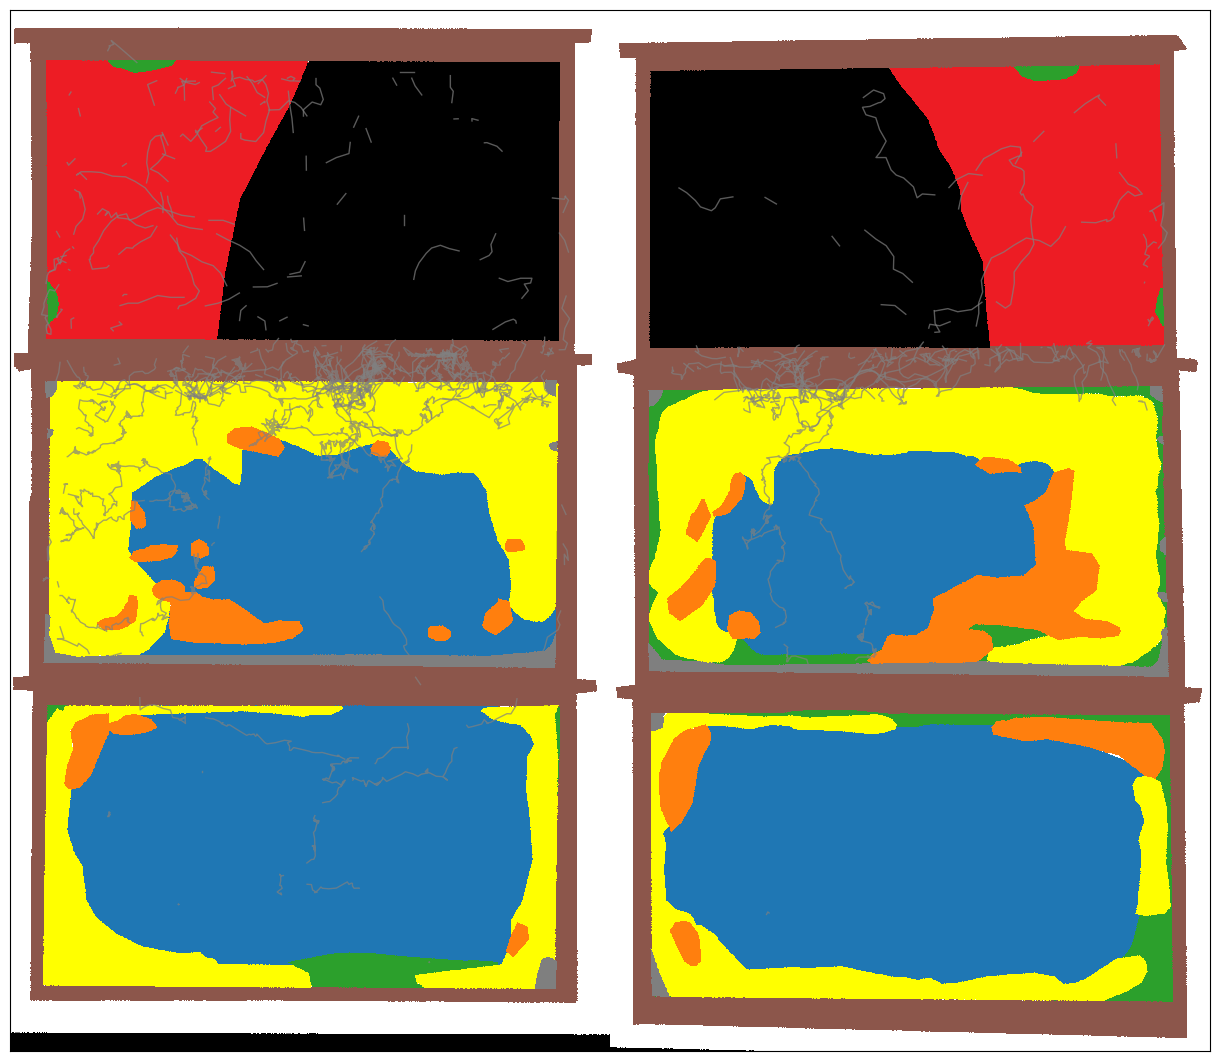

In [21]:
# plot trajectory of a single bee
beeID = 672 #582
minTime,maxTime = 4.5,4.6 # days
dfTraj_selected = dfTraj[(dfTraj['uid']==beeID) & (minTime < dfTraj['Time (days)']) & (dfTraj['Time (days)'] < maxTime)]

daynum = int(np.floor(minTime))
ax = bp.showcomb(combDict[daynum])
bp.plotbee_xy(dfTraj_selected['x'],dfTraj_selected['y'],dfTraj_selected['camera'],ax=ax,color='gray')
#bp.showframe(ax)